Contexto

En este trabajo usaremos con un registro de clientes de un banco e información sobre su salud financiera. La base contenida en el csv Credit contiene las siguientes variables:

    Income : Ingreso anual disponible en miles de dólares.
    Limit : Límite del crédito.
    Rating : Ranking del crédito.
    Cards : Cantidad de tarjetas de credito.
    Age : Edad del usuario.
    Education : Años de educación del usuario.
    Gender : ¿Hombre o mujer?
    Student : ¿Es estudiante?
    Married : ¿Está casado?
    Ethnicity : Etnicidad del usuario (Caucásico, Afroamericano, Asiático)
    Balance : Promedio de deuda en tarjeta de crédito de usuario.



## Prepare el ambiente de trabajo

* Importe las librerías básicas para el análisis de datos.
* Incluya los import base de statsmodels .
* Importe la base de datos `Credit.csv` y elimine la columna Unnamed: 0 .
* Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de Ethnicity , genere binarias para AfricanAmerican y Asian.
    * tip: Utilice value_counts() para revisar la cantidad de casos en las variables categóricas.

Librerias Necesarias

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats


##Preprocesamiento

In [31]:
url = '/Credit.csv'
df = pd.read_csv(url)


In [32]:
df.head(10)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,7,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


In [33]:
df.dtypes

,0
Unnamed: 0,int64
Income,float64
Limit,int64
Rating,int64
Cards,int64
Age,int64
Education,int64
Gender,object
Student,object
Married,object


In [131]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance,is_African American,Asian
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000,0.2475,0.255000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877,0.4321,0.436407
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.0000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000,0.0000,0.000000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000,0.0000,0.000000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000,0.0000,1.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000,1.0000,1.000000


In [34]:
df = df.drop('Unnamed: 0', axis=1)
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [35]:
df['Ethnicity'].value_counts()

,count
Ethnicity,
Caucasian,199
Asian,102
African American,99


In [36]:
df['is_African American'] = (df['Ethnicity'] == 'African American').astype(int)
df['Asian'] = (df['Ethnicity'] == 'Asian').astype(int)

In [38]:
df[['is_African American', 'Asian']]

,is_African American,Asian
0,0,0
1,0,1
2,0,1
3,0,1
4,0,0
...,...,...
395,0,0
396,1,0
397,0,0
398,0,0


,0
is_African American,0
Asian,0


In [132]:
def plot_hist(df, column):

  valor_promedio = df[column].mean()
  valor_mediana = df[column].median()
  plt.hist(df[column], bins=30, alpha=0.5)
  plt.axvline(valor_promedio, color='r', linestyle='dashed', linewidth=2, label='Media')
  plt.axvline(valor_mediana, color='b', linestyle='dashed', linewidth=2, label='Mediana')
  plt.title(f'Histograma de {column}')
  plt.xlabel(column)
  plt.ylabel('Frecuencia')
  plt.legend(loc='upper right')
  plt.show()

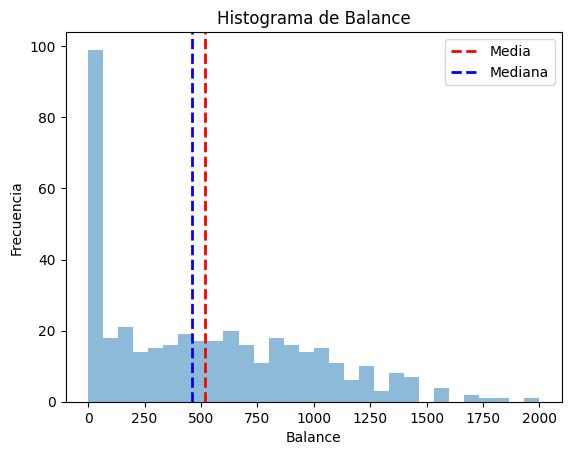

In [133]:
plot_hist(df, 'Balance')


El análisis que podemos hacer del comportamiento de esta variable, observando que se encuentra hacia la izquierda del gráfico, es que la mayoría de usuarios no tienen deudas muy grandes en sus tarjetas de crédito.

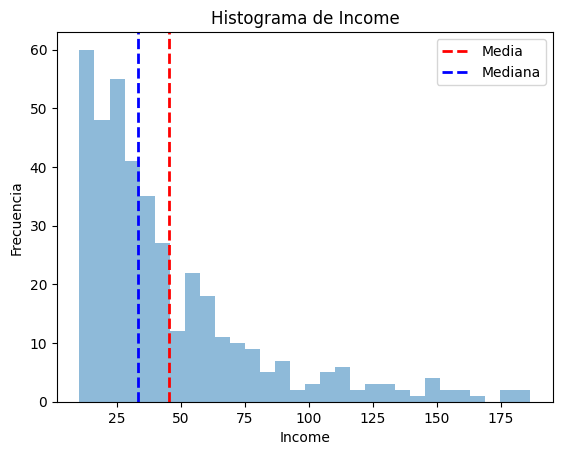

In [134]:
plot_hist(df, 'Income')

Esta variable se nos muestra hacia la izquierda del gráfico, y nos indica que la mayoría de los usuarios no tienen grandes ingresos anualmente.

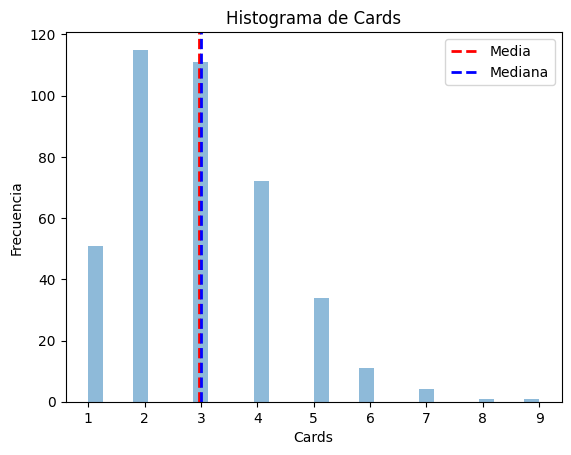

In [135]:
plot_hist(df, 'Cards')

El gráfico de la variable Cards nos muestra que  el promedio y la mediana de tarjetas de crédito es 3. Y que muy pocas personas tienen mas de 5.

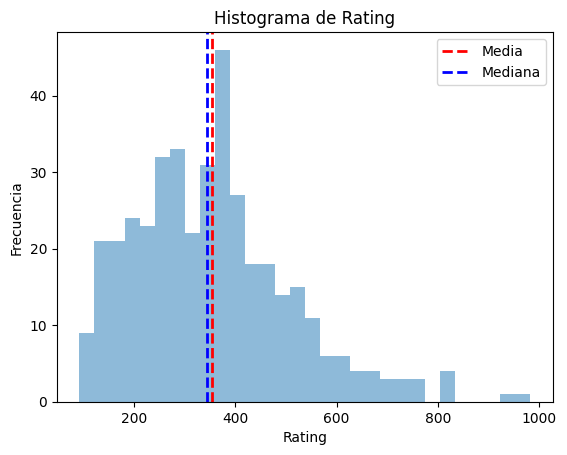

In [136]:
plot_hist(df, 'Rating')

Este gráfico nos muestra la evaluación crediticia. La media y mediana se concentran entre los 300 y 400 puntos.

In [24]:
# Crear instancia de la clase Preprocesamiento con los pasos necesarios
#preproc = Preprocesamiento(['extraer_datos', 'verificar_categoricas', 'visualizar_categoricas','generar_binarias', 'eliminar_binarias_redundantes','visualizar_datos'])

##  Genere gráficos descriptivos para las variables contínuas

* Genere una función llamada plot_hist que genere un histograma de la variable e indique la media y mediana de la misma. Agrege una legenda para indicar qué representa cada línea.
* ¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?